<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#F2CC5D;font-family:newtimeroman;color:#27251F;font-size:200%;text-align:center;border-radius:9px 9px;">SPACESHIP TITANIC EDA and MACHINE LEARNING</p>

<a id="1"></a>

## <b>1 <span style='color:#4a8fdd'>|</span> INTRODUCTION</b>

<a id="2"></a>

### <b>2<span style='color:#4a8fdd'>|</span> IMPORT NECESSARY LIBRARIES</b>

In [131]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

import random
from nltk.corpus import names
import nltk
nltk.download("names")
from nltk import NaiveBayesClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from collections import Counter


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

matplotlib.rc("xtick", labelsize = 14) 
matplotlib.rc("ytick", labelsize = 14)

from sklearn import set_config
set_config(print_changed_only = False)

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\HOME\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!


<a id="3"></a>

### <b>3<span style='color:#4a8fdd'>|</span> LOAD DATASETS</b>

In [132]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

<a id="4"></a>

### <b>4<span style='color:#4a8fdd'>|</span> INITIAL INFORMATION ABOUT DATASET </b>

<a id="4.1"></a>

##### <b>4.1 <span style='color:#4a8fdd'>|</span> Look at train dataset</b>

In [133]:
train_data.head().style.background_gradient(cmap = "magma")

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.000000,False,0.000000,0.000000,0.000000,0.000000,0.000000,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.000000,False,109.000000,9.000000,25.000000,549.000000,44.000000,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.000000,True,43.000000,3576.000000,0.000000,6715.000000,49.000000,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.000000,False,0.000000,1283.000000,371.000000,3329.000000,193.000000,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.000000,False,303.000000,70.000000,151.000000,565.000000,2.000000,Willy Santantines,True


<a id="4.2"></a>

##### <b>4.2 <span style='color:#4a8fdd'>|</span> Look at test dataset</b>

In [134]:
test_data.head().style.background_gradient(cmap = "rocket")

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.000000,False,0.000000,0.000000,0.000000,0.000000,0.000000,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.000000,False,0.000000,9.000000,0.000000,2823.000000,0.000000,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.000000,False,0.000000,0.000000,0.000000,0.000000,0.000000,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.000000,False,0.000000,6652.000000,0.000000,181.000000,585.000000,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.000000,False,10.000000,0.000000,635.000000,0.000000,0.000000,Brence Harperez


<a id="4.3"></a>

##### <b>4.3 <span style='color:#4a8fdd'>|</span> Change column names of train and test datasets</b>

In [135]:
datasets = [train_data, test_data]
for data in datasets:
    data.rename(columns = {"PassengerId" : "id", "HomePlanet" : "home_planet", 
                   "CryoSleep" : "cryo_sleep", "Cabin" : "cabin", 
                   "Destination" : "destination", "Age" : "age",
                   "VIP" : "vip", "RoomService" : "room_service",
                   "FoodCourt" : "food_court", "ShoppingMall" : "shopping_mall",
                   "Spa" : "spa", "VRDeck" : "vr_deck", "Name" : "name",
                   "Transported" : "transported"}, inplace = True)

<a id="4.4"></a>

##### <b>4.4 <span style='color:#4a8fdd'>|</span> Change values of some variables</b>

In [136]:
train_data["transported"] = train_data["transported"].replace(to_replace = [False, True], 
                                  value = ["No", "Yes"])
train_data["vip"] = train_data["vip"].replace(to_replace = [False, True], 
                                  value = ["No", "Yes"]).astype("object")
train_data["cryo_sleep"] = train_data["cryo_sleep"].replace(to_replace = [False, True], 
                                  value = ["No", "Yes"]).astype("object")

<a id="4.5"></a>

##### <b>4.5 <span style='color:#4a8fdd'>|</span> Get the number of rows and columns of train and test datasets</b>

In [137]:
print("The number of rows in train data is {0}, and the number of columns in train data is {1}".
      format(train_data.shape[0], train_data.shape[1]))
      
print("The number of rows in test data is {0}, and the number of columns in test data is {1}".
      format(test_data.shape[0], test_data.shape[1]))

The number of rows in train data is 8693, and the number of columns in train data is 14
The number of rows in test data is 4277, and the number of columns in test data is 13


<a id="4.6"></a>

##### <b>4.6 <span style='color:#4a8fdd'>|</span> Get common information about train dataset</b>

In [138]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             8693 non-null   object 
 1   home_planet    8492 non-null   object 
 2   cryo_sleep     8476 non-null   object 
 3   cabin          8494 non-null   object 
 4   destination    8511 non-null   object 
 5   age            8514 non-null   float64
 6   vip            8490 non-null   object 
 7   room_service   8512 non-null   float64
 8   food_court     8510 non-null   float64
 9   shopping_mall  8485 non-null   float64
 10  spa            8510 non-null   float64
 11  vr_deck        8505 non-null   float64
 12  name           8493 non-null   object 
 13  transported    8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 950.9+ KB


<a id="4.7"></a>

##### <b>4.7 <span style='color:#4a8fdd'>|</span> Get descriptive statistics of numeric variables of train dataset</b>

In [139]:
train_data.describe().T.style.background_gradient(cmap = "spring")

,count,mean,std,min,25%,50%,75%,max
age,8514.000000,28.827930,14.489021,0.000000,19.000000,27.000000,38.000000,79.000000
room_service,8512.000000,224.687617,666.717663,0.000000,0.000000,0.000000,47.000000,14327.000000
food_court,8510.000000,458.077203,1611.489240,0.000000,0.000000,0.000000,76.000000,29813.000000
shopping_mall,8485.000000,173.729169,604.696458,0.000000,0.000000,0.000000,27.000000,23492.000000
spa,8510.000000,311.138778,1136.705535,0.000000,0.000000,0.000000,59.000000,22408.000000
vr_deck,8505.000000,304.854791,1145.717189,0.000000,0.000000,0.000000,46.000000,24133.000000


<div style="border-radius:10px;
            border : black solid;
            background-color: #F2CC5D;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center>What can we see from this statistic?</center></h4>  
    
    
- The average age of passengers on board is 29, the oldest passenger is 79 years old
- The average cost of passengers for the use of shopping mall is 174, and the maximum cost is 23492
- The average cost of passengers for the use of spa is 311, and the maximum cost is 22408
- The average cost of passengers for the use of VR deck is 305, and the maximum cost is 24133
- The average cost of passengers for the use of room services is 225, and the maximum cost is 14327
- The average cost of passengers for the use of food court is 458, and the maximum cost is 29813

<a id="4.8"></a>

##### <b>4.8 <span style='color:#4a8fdd'>|</span> How many passengers have not spent any money?</b>

In [140]:
not_billed_data = train_data[(train_data["room_service"] == 0)
                         & (train_data["spa"] == 0)
                         & (train_data["food_court"] == 0) 
                         & (train_data["shopping_mall"] == 0)
                         & (train_data["vr_deck"] == 0)]

mean_age = round(not_billed_data["age"].mean())
print("There are {0} passengers on the board of the spaceship who have not spent money, their average age is {1}"
      .format(not_billed_data.shape[0], mean_age))

There are 3247 passengers on the board of the spaceship who have not spent money, their average age is 25


<a id="4.9"></a>

##### <b>4.9 <span style='color:#4a8fdd'>|</span> Get descriptive statistic of categoric variables of train dataset</b>

In [141]:
train_data.describe(include = "object").T

,count,unique,top,freq
id,8693,8693,0001_01,1
home_planet,8492,3,Earth,4602
cryo_sleep,8476,2,No,5439
cabin,8494,6560,G/734/S,8
destination,8511,3,TRAPPIST-1e,5915
vip,8490,2,No,8291
name,8493,8473,Gollux Reedall,2
transported,8693,2,Yes,4378


<div style="border-radius:10px;
            border : black solid;
            background-color: #7AFF33;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center>What can we see from this statistic?</center></h4>  
    
- From here we can see that most of the passengers are from the Earth planet. Majority of them were traveling to TRAPPIST-1e. 'Gollux Reedall' is only name in dataset that repeated two times. The number of transported passengers are more than not transported.

<a id="4.10"></a>

##### <b>4.10 <span style='color:#4a8fdd'>|</span> Check null values of train dataset</b>

In [142]:
train_data.isnull().sum()

id                 0
home_planet      201
cryo_sleep       217
cabin            199
destination      182
age              179
vip              203
room_service     181
food_court       183
shopping_mall    208
spa              183
vr_deck          188
name             200
transported        0
dtype: int64

<div style="border-radius:10px;
            border : black solid;
            background-color: #33FFFC;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center>Missing values</center></h4>  
    
- There are many missing values in the columns of the dataset (except 'id' and 'transported' columns)

<a id="4.11"></a>

##### <b>4.11 <span style='color:#4a8fdd'>|</span> Visualize missing values</b>

<AxesSubplot:>

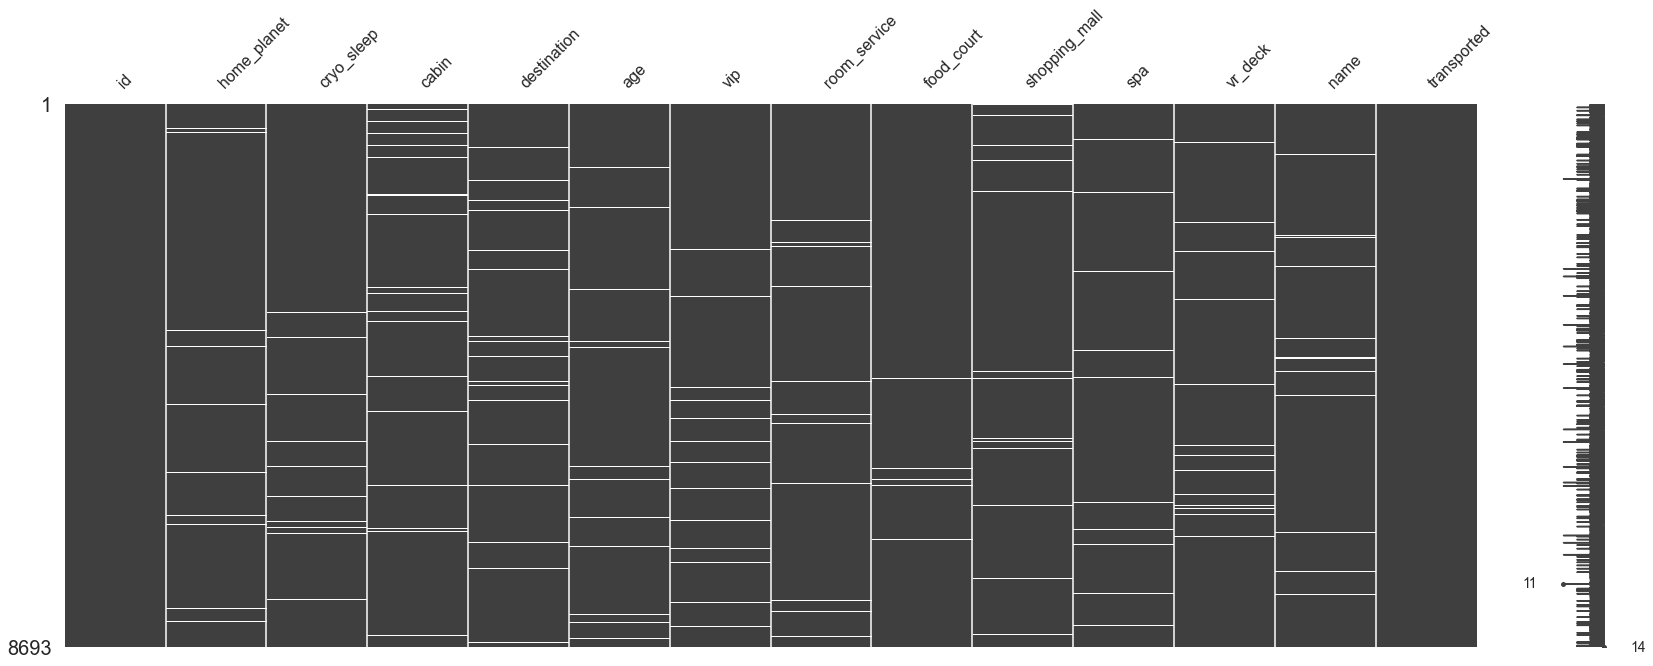

In [143]:
msno.matrix(train_data)

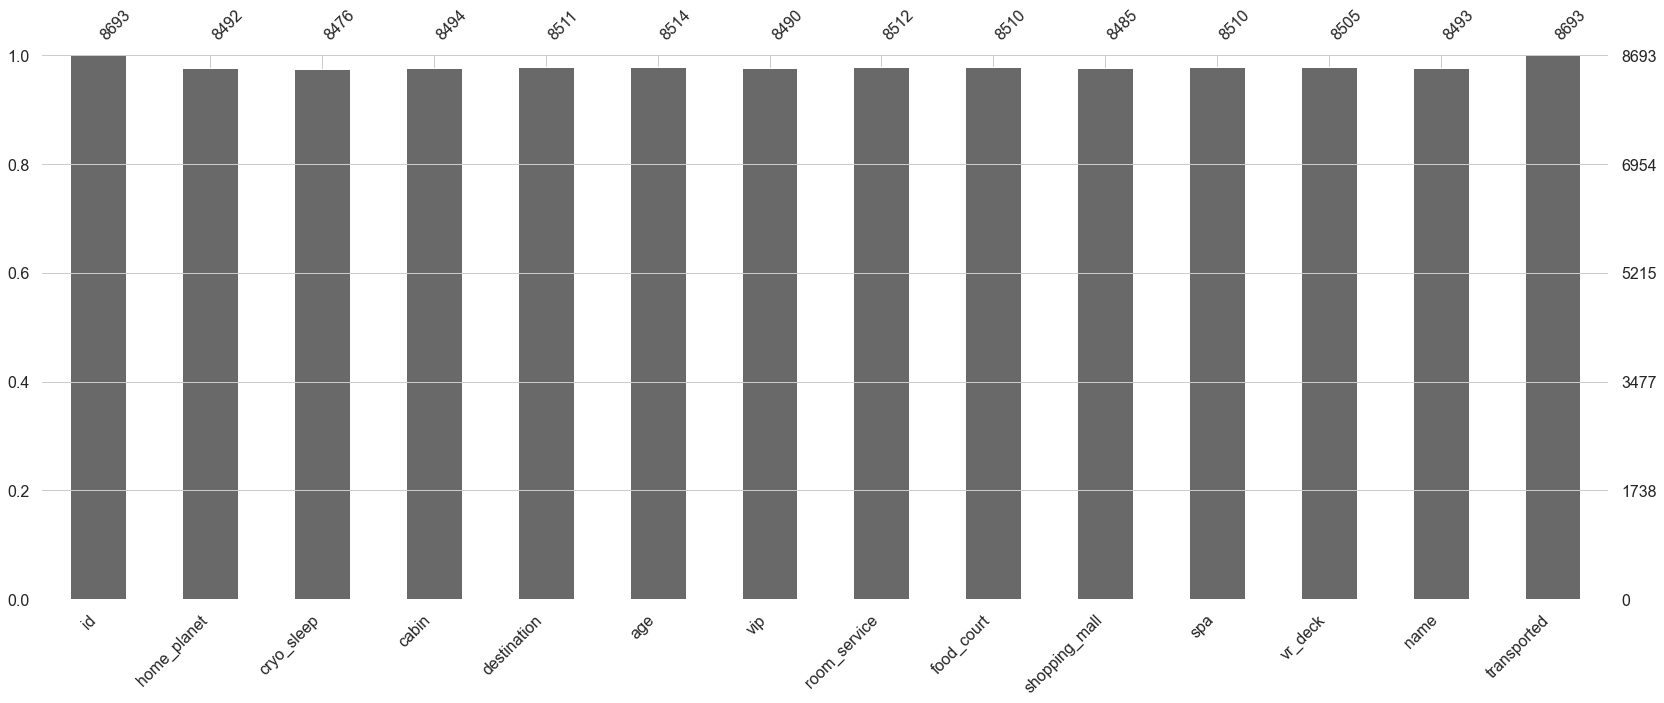

In [144]:
msno.bar(train_data);

<a id="4.12"></a>

##### <b>4.12 <span style='color:#4a8fdd'>|</span> Fill null values with median (numeric) and frequent values (categoric)</b>

In [145]:
numeric_data = [column for column in train_data.select_dtypes(["int", "float"])]
categoric_data = [column for column in train_data.select_dtypes(exclude = ["int", "float"])]
test_categoric_data = [column for column in test_data.select_dtypes(exclude = ["int", "float"])]

for col in numeric_data:
    train_data[col].fillna(train_data[col].median(), inplace = True)
    test_data[col].fillna(test_data[col].median(), inplace = True)
    
#replace missing values in each categorical column with the most frequent value
for col in categoric_data:
    train_data[col].fillna(train_data[col].value_counts().index[0], inplace = True)
for col in test_categoric_data:
    test_data[col].fillna(test_data[col].value_counts().index[0], inplace = True) 

<a id="4.13"></a>

##### <b>4.13 <span style='color:#4a8fdd'>|</span> Check null values again</b>

In [146]:
train_data.isnull().sum().sum() + test_data.isnull().sum().sum()

0

<a id="4.14"></a>

##### <b>4.14 <span style='color:#4a8fdd'>|</span> Get the names of categoric variables</b>

In [147]:
print("Columns in object data type: \n",
      list((train_data.select_dtypes("object").columns)))

Columns in object data type: 
 ['id', 'home_planet', 'cryo_sleep', 'cabin', 'destination', 'vip', 'name', 'transported']


<a id="4.15"></a>

##### <b>4.15 <span style='color:#4a8fdd'>|</span> Get the names of numeric variables</b>

In [148]:
print("Columns in numeric data type: \n",
      list((train_data.select_dtypes(["int", "float"]).columns)))

Columns in numeric data type: 
 ['age', 'room_service', 'food_court', 'shopping_mall', 'spa', 'vr_deck']


<a id="4.16"></a>

##### <b>4.16 <span style='color:#4a8fdd'>|</span> Get class frequencies of some variables</b>

In [149]:
print("Class frequencies of 'home_planet' variable: \n\n",
      train_data["home_planet"].value_counts())
print("___________________________________________")

print("Class frequencies of 'destination' variable: \n\n",
      train_data["destination"].value_counts())

Class frequencies of 'home_planet' variable: 

 Earth     4803
Europa    2131
Mars      1759
Name: home_planet, dtype: int64
___________________________________________
Class frequencies of 'destination' variable: 

 TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: destination, dtype: int64


<a id="4.17"></a>

##### <b>4.17 <span style='color:#4a8fdd'>|</span> Check correlation between the variables of train dataset</b>

In [150]:
train_data.corr().style.background_gradient(cmap = "viridis")

,age,room_service,food_court,shopping_mall,spa,vr_deck
age,1.000000,0.068629,0.127390,0.033148,0.120946,0.099590
room_service,0.068629,1.000000,-0.015126,0.052337,0.009244,-0.018624
food_court,0.127390,-0.015126,1.000000,-0.013717,0.221468,0.224572
shopping_mall,0.033148,0.052337,-0.013717,1.000000,0.014542,-0.007849
spa,0.120946,0.009244,0.221468,0.014542,1.000000,0.147658
vr_deck,0.099590,-0.018624,0.224572,-0.007849,0.147658,1.000000


<a id="5"></a>

### <b>5<span style='color:#4a8fdd'>|</span> DATA VISUALIZATION </b>

<a id="5.1"></a>

##### <b>5.1<span style='color:#4a8fdd'>|</span> Histogram</b>

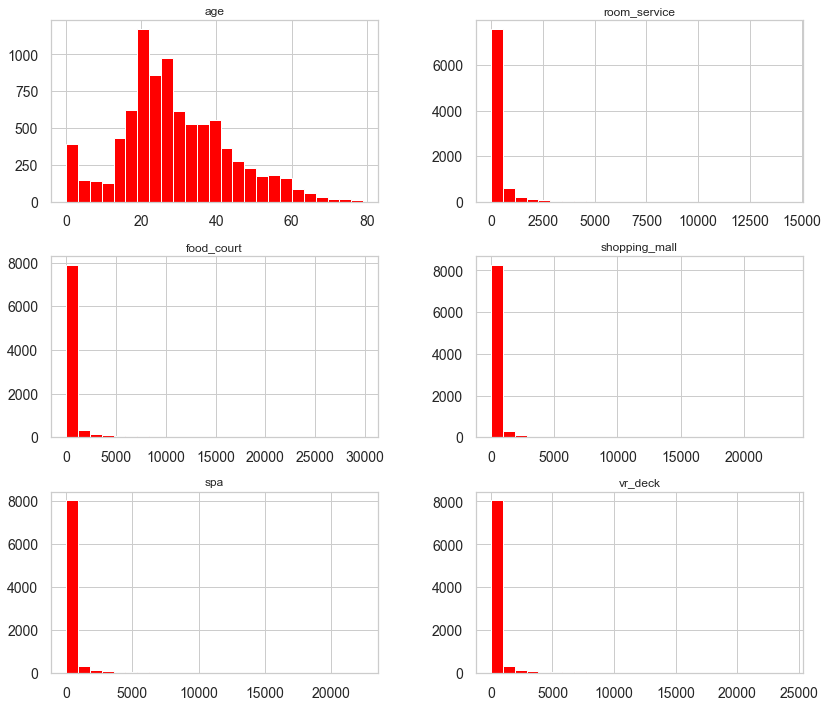

In [151]:
train_data.hist(bins = 25, figsize = (12, 12), color='red')
plt.show()


 Analyzing the graphs here, it turns out that the values of the variables are not normally distributed. 



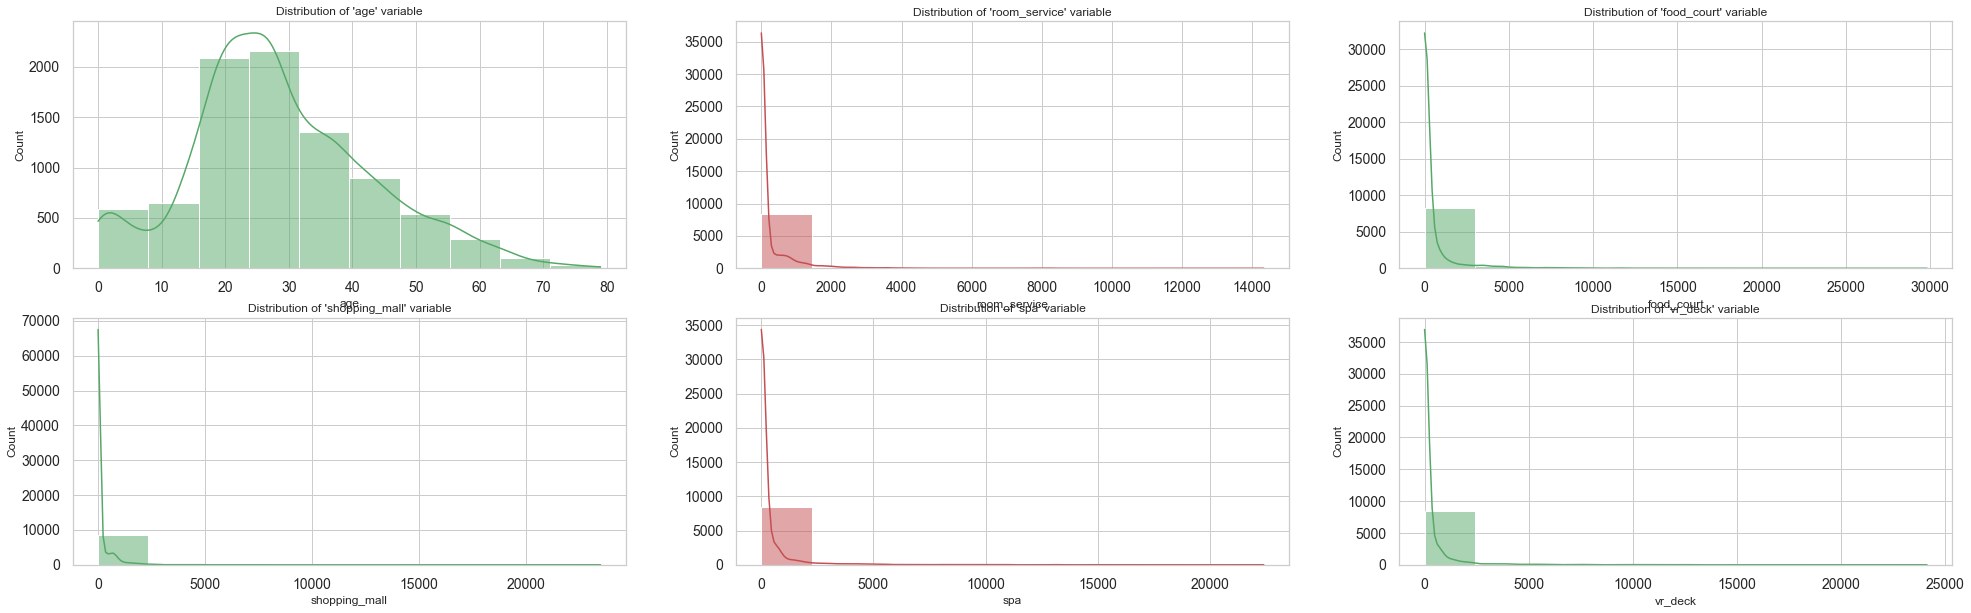

In [152]:
fig, axes = plt.subplots(2, 3, figsize=(30, 10))
axes = axes.flatten()
sns.histplot(ax = axes[0], x = train_data["age"],
             bins = 10,
             kde = True,
             color = "g").set(title = "Distribution of 'age' variable");

sns.histplot(ax = axes[1], x = train_data["room_service"],
             bins = 10,
             kde = True,
             color = "r").set(title = "Distribution of 'room_service' variable");

sns.histplot(ax = axes[2], x = train_data["food_court"],
             bins = 10,
             kde = True,
             color = "g").set(title = "Distribution of 'food_court' variable");

sns.histplot(ax = axes[3], x = train_data["shopping_mall"],
             bins = 10,
             kde = True,
             color = "g").set(title = "Distribution of 'shopping_mall' variable");

sns.histplot(ax = axes[4], x = train_data["spa"],
             bins = 10,
             kde = True,
             color = "r").set(title = "Distribution of 'spa' variable");

sns.histplot(ax = axes[5], x = train_data["vr_deck"],
             bins = 10,
             kde = True,
             color = "g").set(title = "Distribution of 'vr_deck' variable");

print("\n Analyzing the graphs here, it turns out that the values of the variables are not normally distributed. \n")

<a id="5.2"></a>

##### <b>5.2<span style='color:#4a8fdd'>|</span> Get the number of age periods of passengers</b>

In [153]:
datasets = [train_data, test_data]
for data in datasets:
    baby = train_data[train_data["age"] <= 5]
    kid = train_data[(train_data["age"] > 5) & (train_data["age"] <= 10)]
    teenager = train_data[(train_data["age"] > 10) & (train_data["age"] <= 20)]
    youth = train_data[(train_data["age"] > 20) & (train_data["age"] <= 40)]
    adult = train_data[(train_data["age"] > 40) & (train_data["age"] <= 60)]
    old = train_data[(train_data["age"] > 60)]
        
print("Number of baby passengers: ", baby.shape[0])
print("Number of kid passengers: ", kid.shape[0])
print("Number of teenager passengers: ", teenager.shape[0])
print("Number of youth passengers: ", youth.shape[0])
print("Number of adult passengers: ", adult.shape[0])
print("Number of old passengers: ", old.shape[0])

Number of baby passengers:  499
Number of kid passengers:  219
Number of teenager passengers:  1717
Number of youth passengers:  4527
Number of adult passengers:  1511
Number of old passengers:  220


<a id="5.3"></a>

##### <b>5.3<span style='color:#4a8fdd'>|</span> Barplot</b>

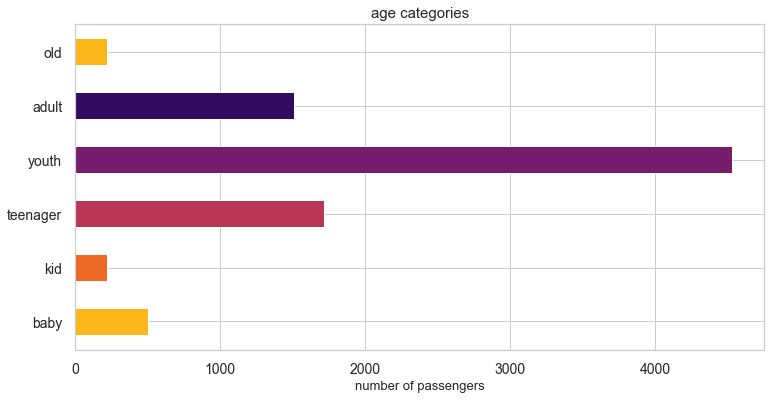

In [154]:
ages = {"baby" : baby.shape[0], "kid" : kid.shape[0],
        "teenager" : teenager.shape[0], "youth" : youth.shape[0],
        "adult" : adult.shape[0], "old" : old.shape[0]}
ages = pd.Series(ages)

plt.figure(figsize = (11, 6))
plt.title("age categories", fontsize = 15)
plt.xlabel("number of passengers", fontsize = 13)

plt.barh(ages.index, ages.values, color = sns.color_palette("inferno_r", 5),
         height = 0.5)
plt.show()

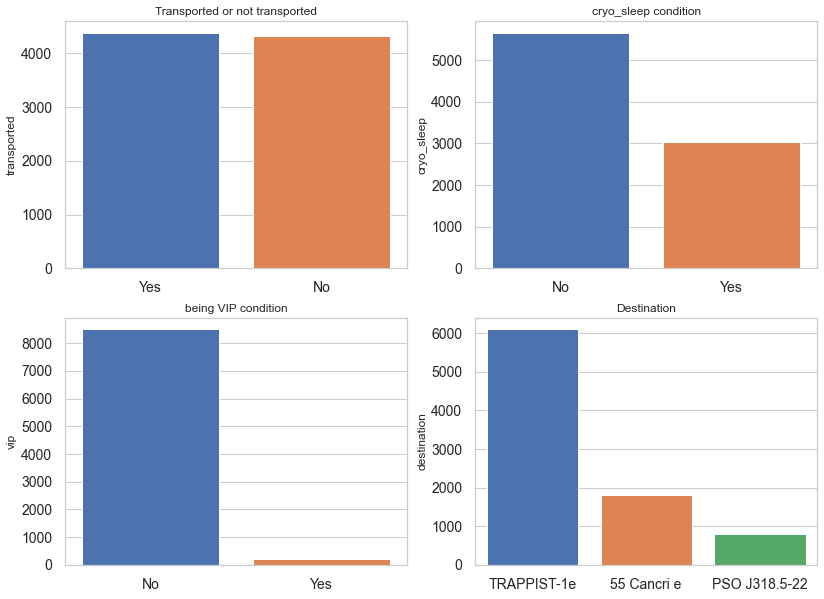

In [155]:
fig, axes = plt.subplots(2, 2, figsize = (12, 10))
axes = axes.flatten()
sns.set_theme(style = "whitegrid")
sns.barplot(ax = axes[0], x = train_data["transported"].value_counts().index,
            y = train_data["transported"].value_counts(),
            data = train_data, saturation = 1).set(title = "Transported or not transported");

sns.barplot(ax = axes[1], x = train_data["cryo_sleep"].value_counts().index,
            y = train_data["cryo_sleep"].value_counts(),
            data = train_data, saturation = 1).set(title = "cryo_sleep condition");

sns.barplot(ax = axes[2], x = train_data["vip"].value_counts().index,
            y = train_data["vip"].value_counts(),
            data = train_data, saturation = 1).set(title = "being VIP condition");

sns.barplot(ax = axes[3], x = train_data["destination"].value_counts().index,
            y = train_data["destination"].value_counts(),
            data = train_data, saturation = 1).set(title = "Destination");

<a id="5.4"></a>

##### <b>5.4<span style='color:#4a8fdd'>|</span> Catplot</b>

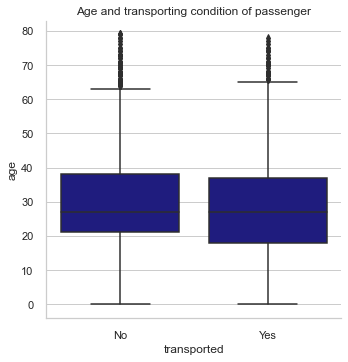

In [156]:
sns.catplot(x = "transported",
            y = "age",
            kind = "box",
            color = '#100C8E',
            data = train_data).set(title = "Age and transporting condition of passenger");

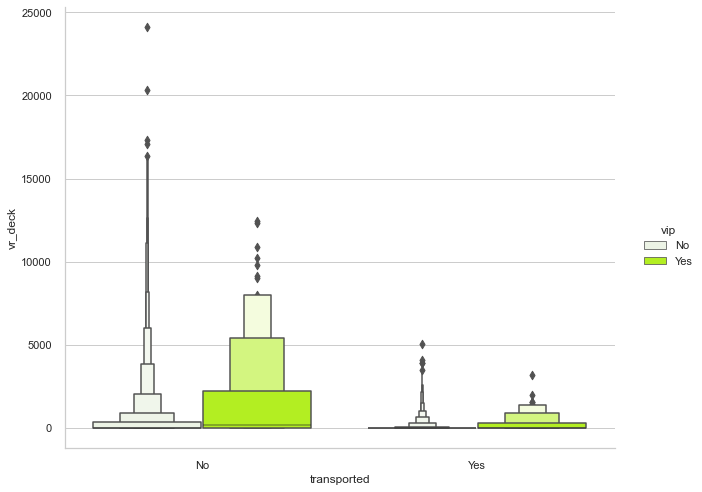

In [157]:
sns.catplot(x = "transported",
            y = "vr_deck",
            kind = "boxen",
            hue = "vip",
            ci = "sd",
            color = '#B3EE22',
            data = train_data, saturation = 1, height = 7, aspect = 1.3,
            margin_titles = True);

<a id="5.5"></a>

##### <b>5.5<span style='color:#4a8fdd'>|</span> Regplot</b>

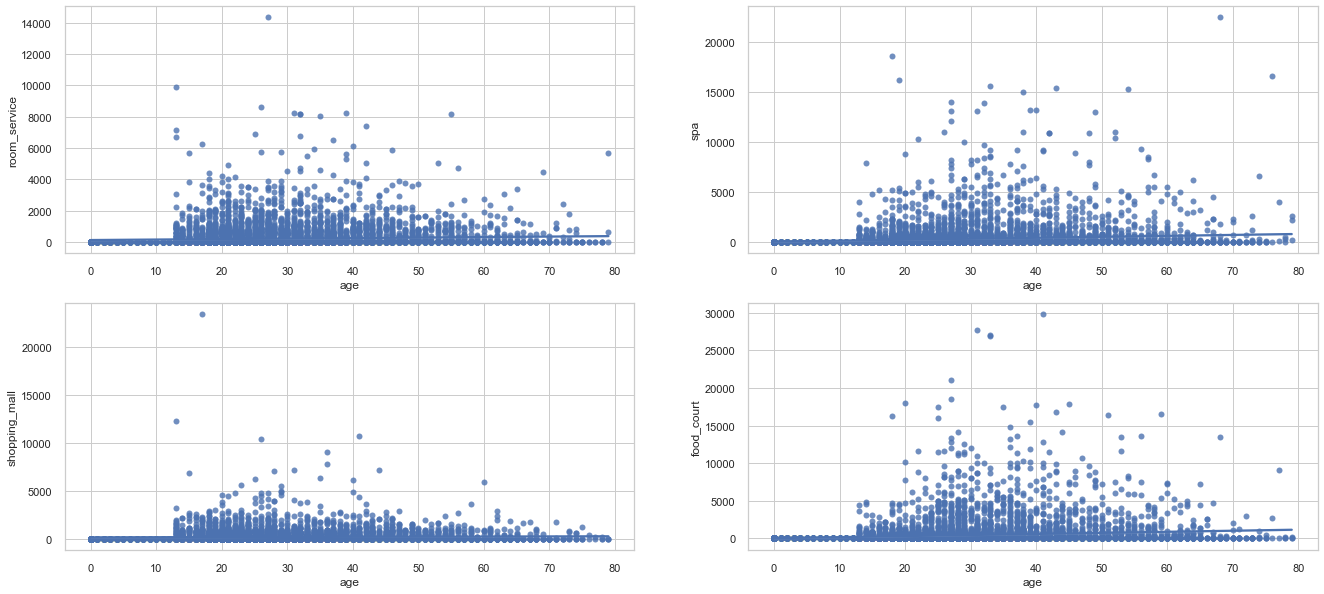

In [158]:
fig, axes = plt.subplots(2, 2, figsize = (20, 10))
axes = axes.flatten()

sns.regplot(ax = axes[0], x = "age", y = "room_service", data = train_data);
sns.regplot(ax = axes[1], x = "age", y = "spa", data = train_data);
sns.regplot(ax = axes[2], x = "age", y = "shopping_mall", data = train_data);
sns.regplot(ax = axes[3], x = "age", y = "food_court", data = train_data);

<a id="5.6"></a>

##### <b>5.6<span style='color:#4a8fdd'>|</span> Heatmap</b>

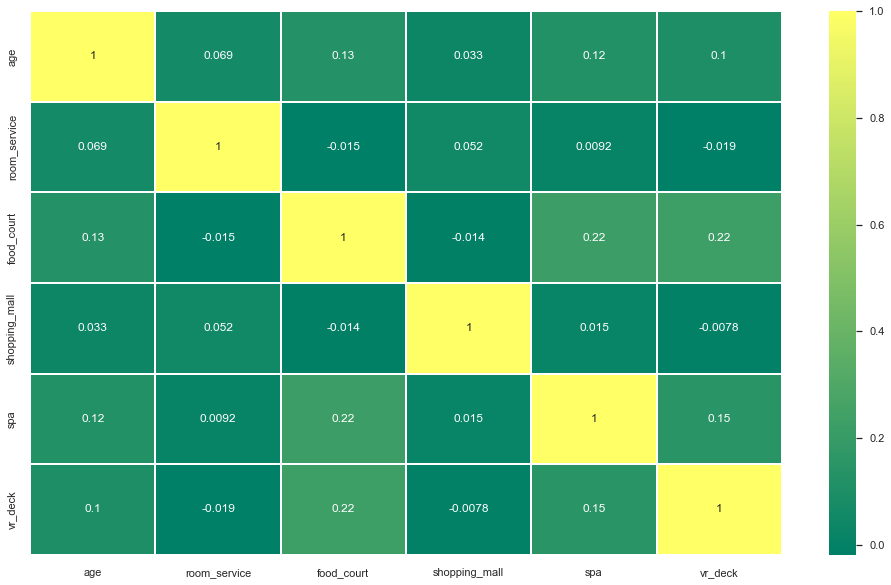

In [159]:
plt.figure(figsize = [15, 10], clear = True, facecolor = 'white')
sns.heatmap(train_data.corr(), annot = True, square = False, linewidths = 2,
            linecolor = "white", cmap = "summer");

<a id="5.7"></a>

##### <b>5.7<span style='color:#4a8fdd'>|</span> Pandas crosstab</b>

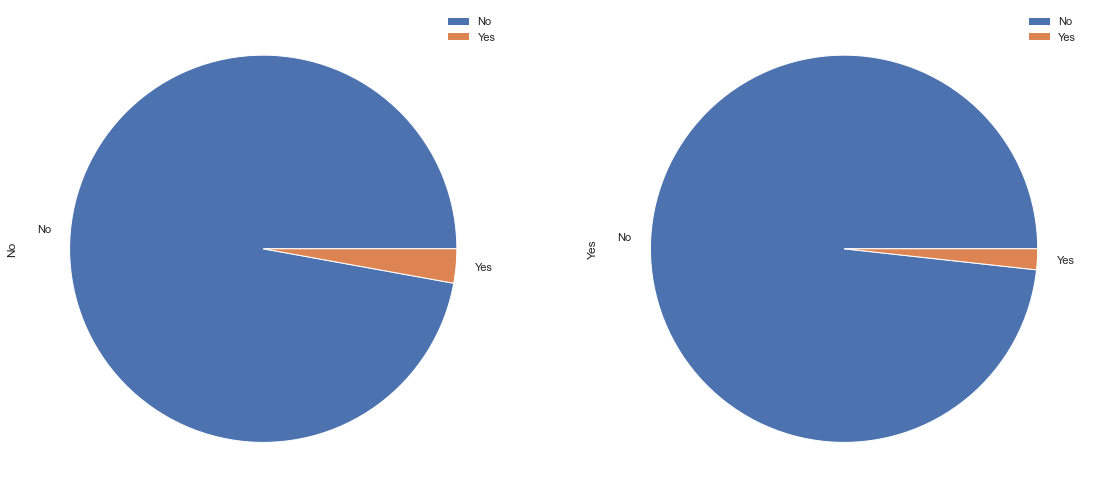

In [160]:
pd.crosstab(train_data["vip"], train_data["transported"],
            normalize = True).plot(kind = "pie",
                                   figsize = (17, 10), subplots = True, stacked=True);

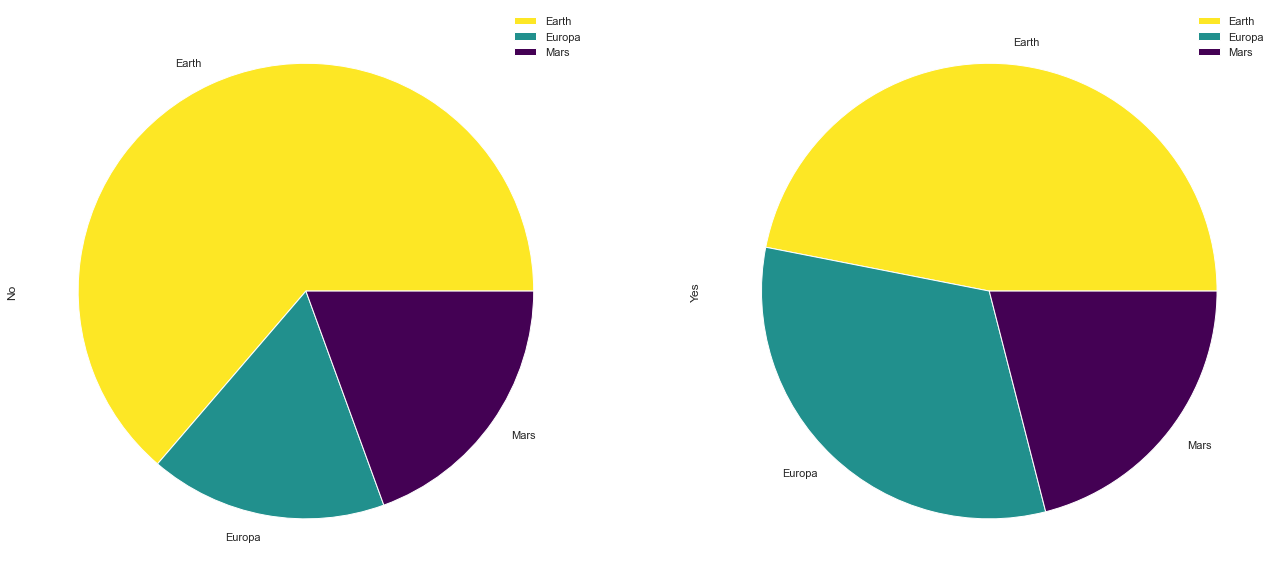

In [161]:
pd.crosstab(train_data["home_planet"], train_data["transported"],
            normalize = True).plot(kind = "pie",
                                   figsize = (20, 20), colormap = "viridis_r",
                                   subplots = True, stacked=True);

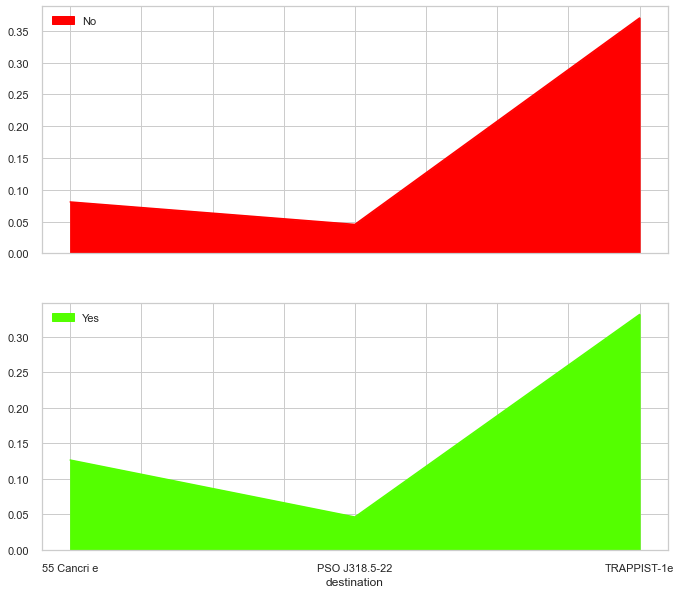

In [162]:
pd.crosstab(train_data["destination"], train_data["transported"],
            normalize = True).plot(kind = "area",
                                   figsize = (10, 10), colormap = "prism",
                                   subplots = True, stacked=True);

<a id="5.8"></a>

##### <b>5.8<span style='color:#4a8fdd'>|</span> Visualization with AutoViz</b>


#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
id,8693,object,0,0.000000,100.000000,1,"combine rare categories, possible ID column: drop"
name,8473,object,0,0.000000,97.469228,1,combine rare categories
cabin,6560,object,0,0.000000,75.463016,1,combine rare categories
food_court,1507,float64,0,0.000000,17.335787,0,highly skewed: drop outliers or do box-cox transform
spa,1327,float64,0,0.000000,15.265156,0,highly skewed: drop outliers or do box-cox transform
vr_deck,1306,float64,0,0.000000,15.023582,0,highly skewed: drop outliers or do box-cox transform
room_service,1273,float64,0,0.000000,14.643966,0,highly skewed: drop outliers or do box-cox transform
shopping_mall,1115,float64,0,0.000000,12.826412,0,highly skewed: drop outliers or do box-cox transform
age,80,float64,0,0.000000,0.920281,0,
home_planet,3,object,0,0.000000,0.034511,1759,


    14 Predictors classified...
        1 variables removed since they were ID or low-information variables
        List of variables removed: ['id']
Number of All Scatter Plots = 21


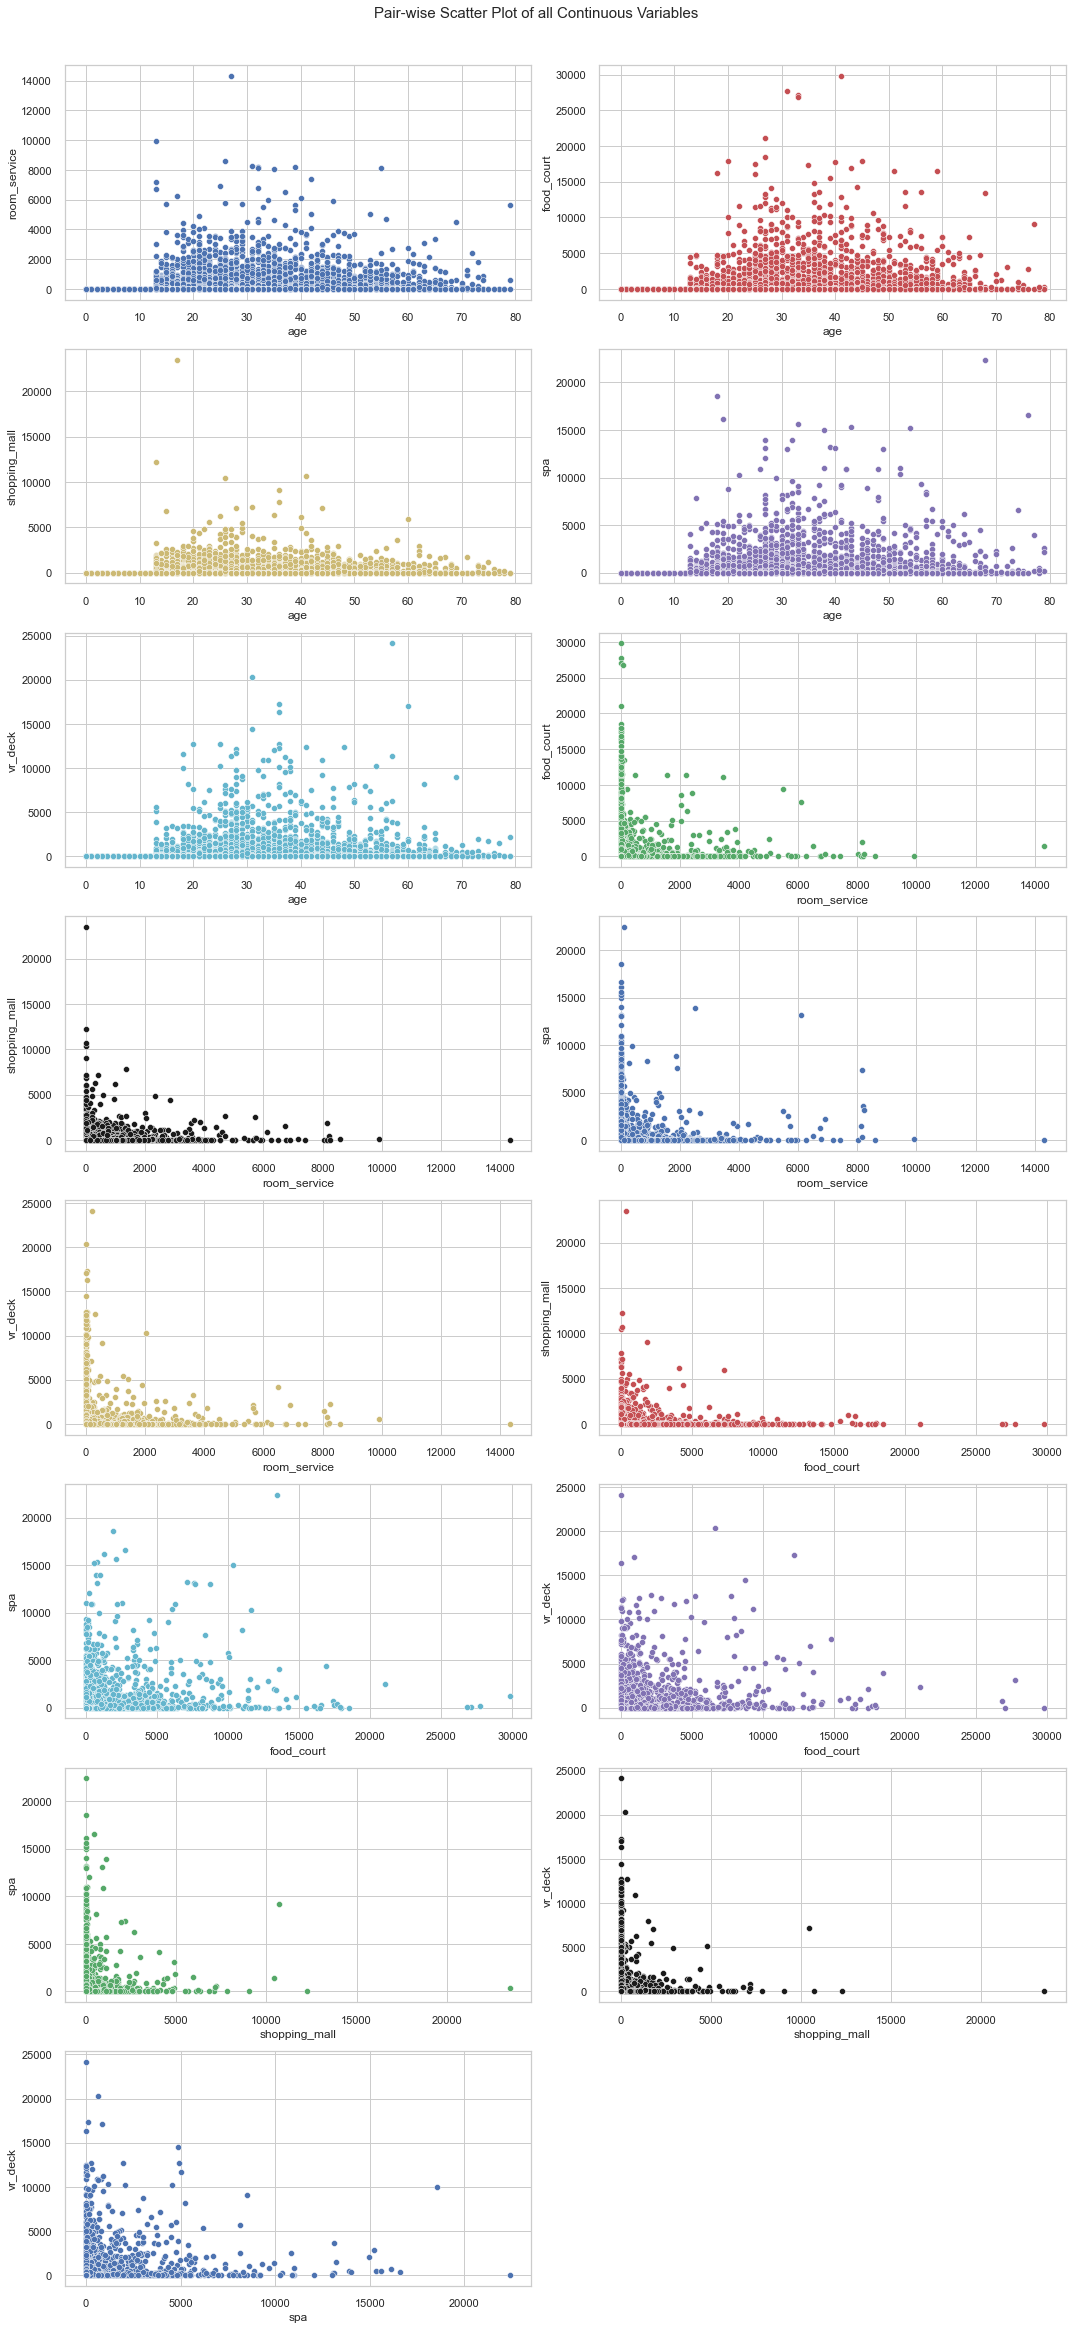

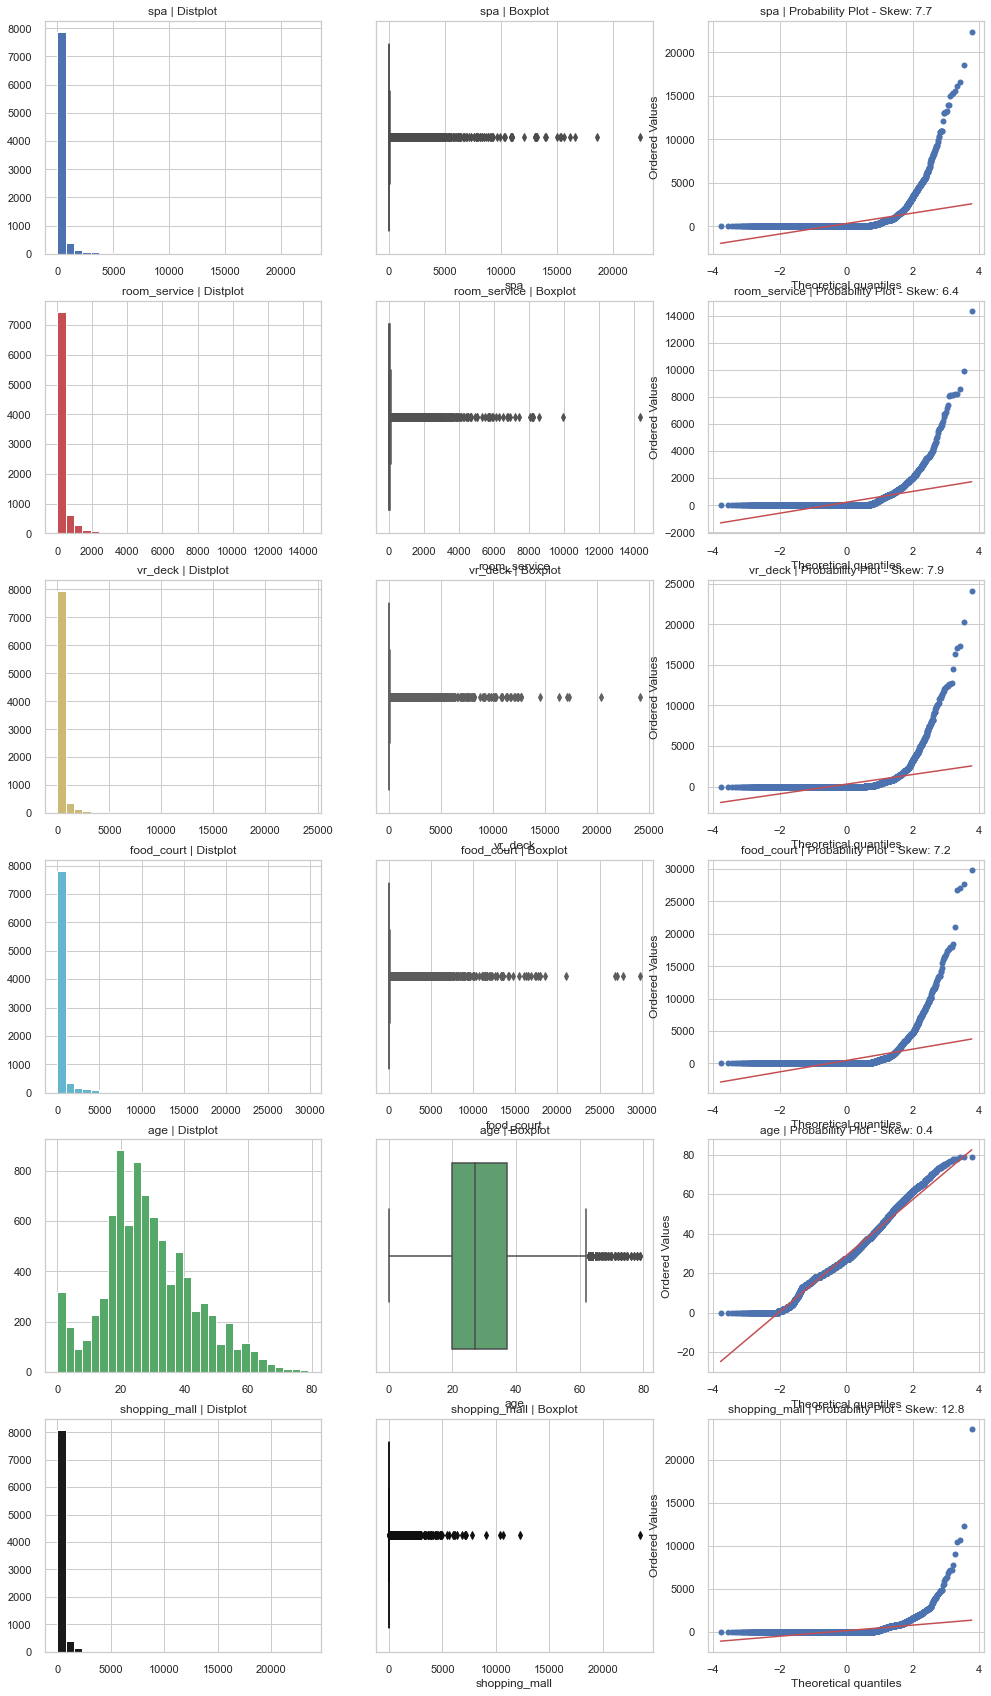

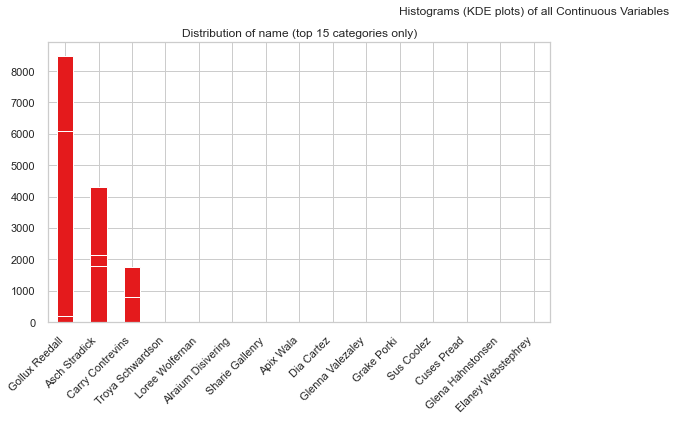

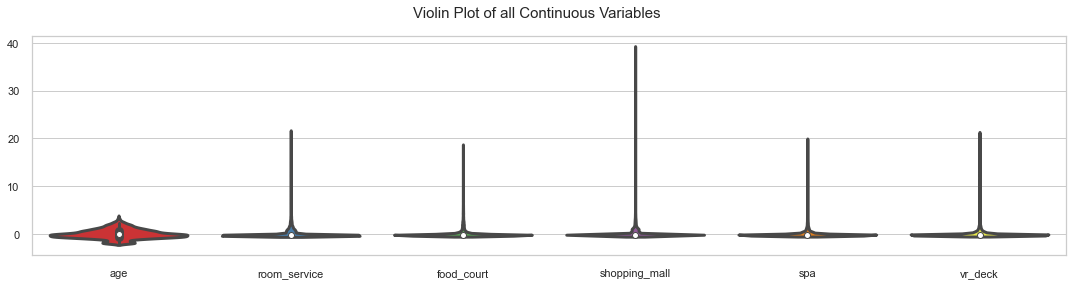

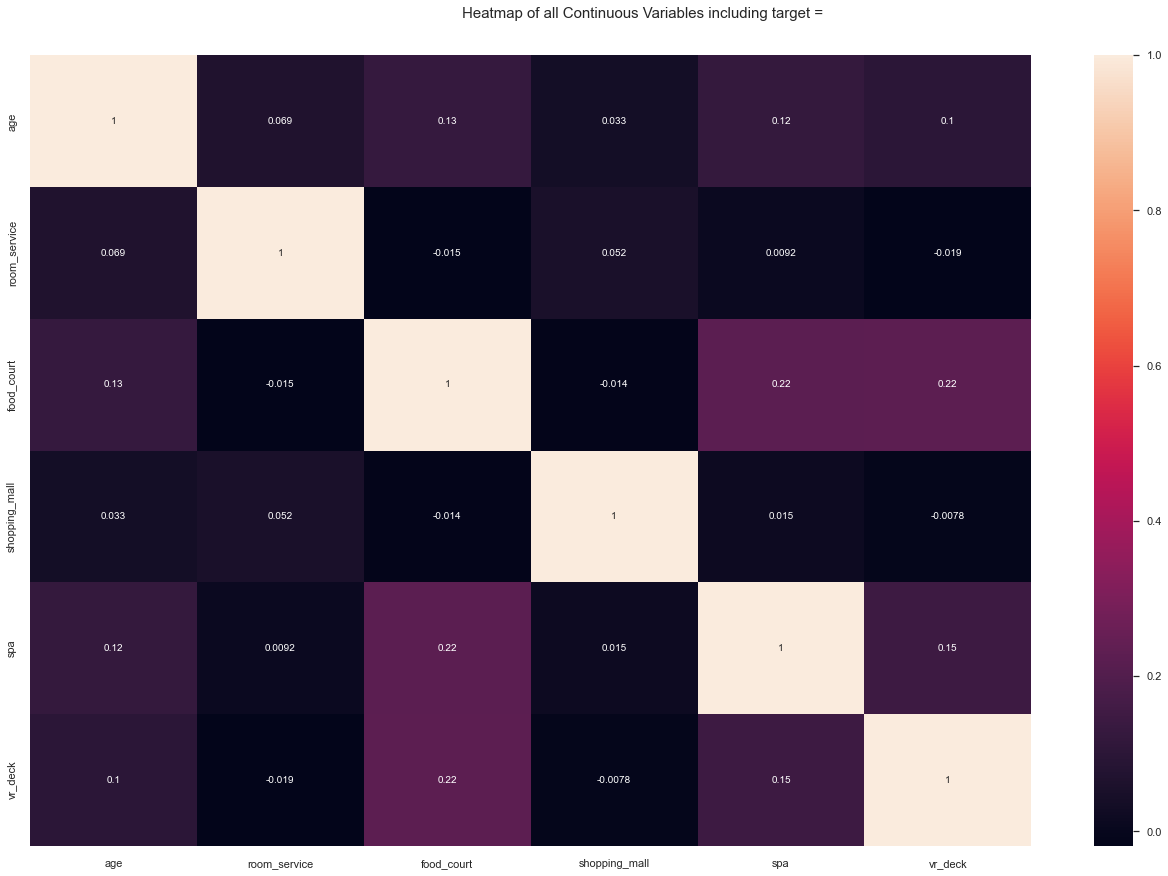

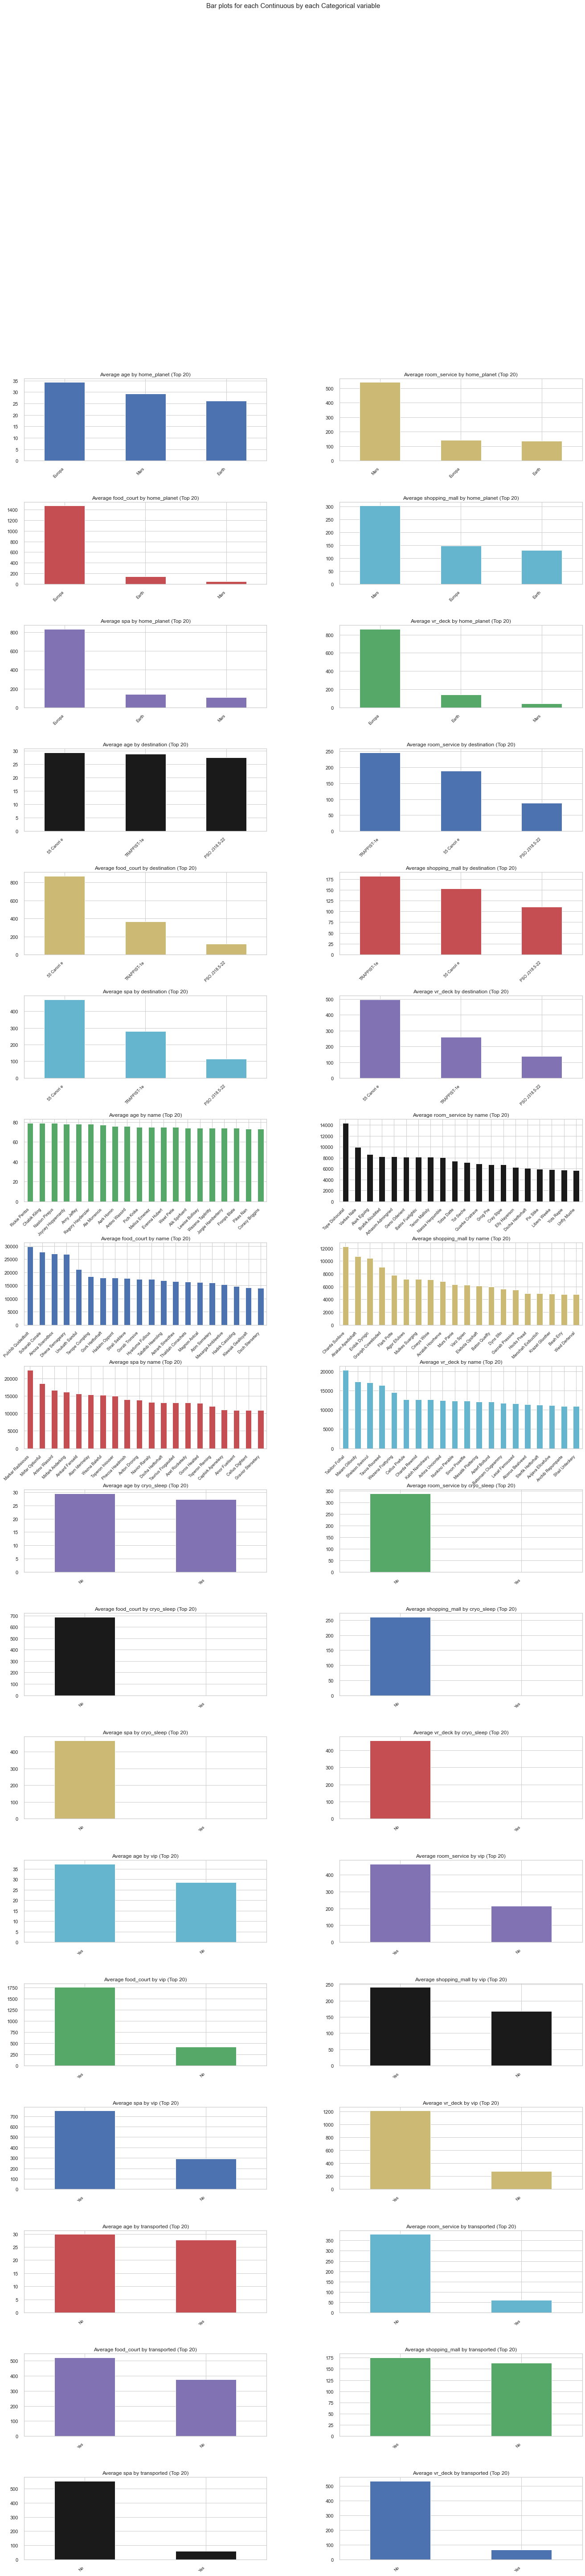

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\HOME\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\HOME\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\HOME\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\HOME\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\HOME\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |   

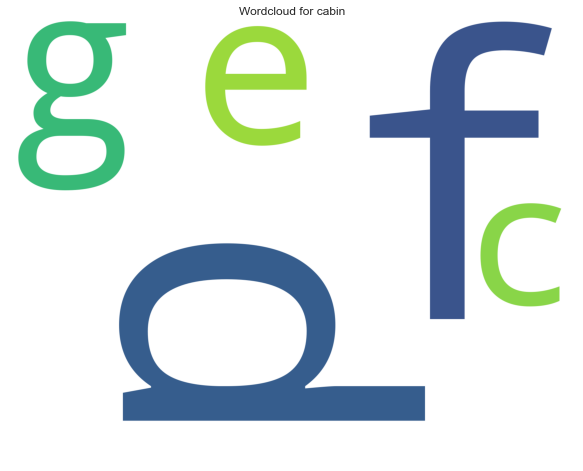

All Plots done
Time to run AutoViz = 19 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [163]:
!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline
av = AutoViz_Class()
dftc = av.AutoViz(filename = '', sep = '', dfte = train_data)

<a id="6"></a>

### <b>6<span style='color:#4a8fdd'>|</span> Statistical ANOVA Test for Feature Selection </b>

<div style="border-radius:10px;
            border : black solid;
            background-color: #8D33FF;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center>What is ANOVA test?</center></h4>  
    
ANOVA stands for Analysis of Variance. It’s a statistical test that was developed by Ronald Fisher in 1918 and has been in use ever since. Put simply, ANOVA tells you if there are any statistical differences between the means of three or more independent groups.

For more information:    
https://www.qualtrics.com/experience-management/research/anova/

In [164]:
numeric_data = [column for column in train_data.select_dtypes(["int", "float"])]

for column in numeric_data:
  df_anova = train_data[[column,'transported']]
  grouped_anova = df_anova.groupby(['transported'])
  f_value, p_value = stats.f_oneway(grouped_anova.get_group('Yes')[column],
                                    grouped_anova.get_group('No')[column])
  result = ""
  if p_value < 0.05:
    result = "{} is important feature for prediction".format(column)
  else:
    result = "{} is not an important feature for prediction".format(column)
  print(result)

age is important feature for prediction
room_service is important feature for prediction
food_court is important feature for prediction
shopping_mall is not an important feature for prediction
spa is important feature for prediction
vr_deck is important feature for prediction


<a id="7"></a>

### <b>7<span style='color:#4a8fdd'>|</span> DATA PREPROCESSING </b>

<a id="7.1"></a>

##### <b>7.1<span style='color:#4a8fdd'>|</span> Look at train dataset</b>

In [165]:
train_data.head()

,id,home_planet,cryo_sleep,cabin,destination,age,vip,room_service,food_court,shopping_mall,spa,vr_deck,name,transported
0,0001_01,Europa,No,B/0/P,TRAPPIST-1e,39.0,No,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,No
1,0002_01,Earth,No,F/0/S,TRAPPIST-1e,24.0,No,109.0,9.0,25.0,549.0,44.0,Juanna Vines,Yes
2,0003_01,Europa,No,A/0/S,TRAPPIST-1e,58.0,Yes,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,No
3,0003_02,Europa,No,A/0/S,TRAPPIST-1e,33.0,No,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,No
4,0004_01,Earth,No,F/1/S,TRAPPIST-1e,16.0,No,303.0,70.0,151.0,565.0,2.0,Willy Santantines,Yes


<a id="7.2"></a>

##### <b>7.2<span style='color:#4a8fdd'>|</span> Managing outliers</b>

In [166]:
def outlier_detection_train(df, n, columns):
    rows = []
    will_drop_train = []
    for col in columns:
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_point = 1.5 * IQR
        rows.extend(df[(df[col] < Q1 - outlier_point)|(df[col] > Q3 + outlier_point)].index)
    for r, c in Counter(rows).items():
        if c >= n: will_drop_train.append(r)
    return will_drop_train

In [167]:
will_drop_train = outlier_detection_train(train_data, 5 ,train_data.select_dtypes(["float", "int"]).columns)
train_data.drop(will_drop_train, inplace = True, axis = 0)

<a id="7.3"></a>

##### <b>7.3<span style='color:#4a8fdd'>|</span> Create new features - Feature engineering</b>

In [168]:
# Create 'deck' and 'side' features from 'cabin' column

train_data["deck"] = train_data["cabin"].apply(lambda x:str(x).split("/")[0])
test_data['deck'] = test_data['cabin'].apply(lambda x:str(x).split('/')[0])

train_data["side"] = train_data["cabin"].apply(lambda x: x.split("/")[2])
test_data["side"] = test_data["cabin"].apply(lambda x: x.split("/")[2])

In [169]:
# Financial situation of passengers

train_data["total_bill"] = train_data["room_service"] + train_data["food_court"] + train_data["shopping_mall"] + train_data["spa"] + train_data["vr_deck"] 
train_data["financial_situation"] = train_data["total_bill"].apply(lambda x: "poor" if x < 5000 else ("middle" if x>5000 and x<20000 else "rich"))

test_data["total_bill"] = test_data["room_service"] + test_data["food_court"] + test_data["shopping_mall"] + test_data["spa"] + test_data["vr_deck"] 
test_data["financial_situation"] = test_data["total_bill"].apply(lambda x: "poor" if x < 5000 else ("middle" if x>5000 and x<20000 else "rich"))

In [170]:
# create new feature ('in_group') from "PassengerID" variable

train_data["group_id"] = train_data["id"].apply(lambda x: x.split("_")[0])
test_data["group_id"] = test_data["id"].apply(lambda x: x.split("_")[0])
train_data["group_number"] = train_data["id"].apply(lambda x: x.split("_")[1])
test_data["group_number"] = test_data["id"].apply(lambda x: x.split("_")[1])

train_g = train_data[train_data["group_id"].duplicated()]["group_id"]
test_g = test_data[test_data["group_id"].duplicated()]["group_id"]
train_data["in_group"] = train_data["group_id"].apply(lambda x: x in train_g.values)
test_data["in_group"] = test_data["group_id"].apply(lambda x: x in test_g.values)


<div style="border-radius:10px;
            border : black solid;
            background-color: #F2CC5D;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center>Acknowledgement</center></h4>  
    
Natural Language Toolkit (NLTK) is a platform used for building programs for text analysis. We can observe that male and female names have some distinctive characteristics. Names ending in a, e and i are likely to be female, while names ending in k, o, r, s and t are likely to be male.
    
The following resource was used to prepare the code block here

https://www.geeksforgeeks.org/python-gender-identification-by-name-using-nltk/

In [171]:
# FOR TRAIN_DATA

# get names from the 'name' columns of train_data

names_train_data = []
for n in train_data["name"]:
    a = n.split()
    names_train_data.append(a[0])

In [172]:
# define function to get last words from the name

def gender_features(word):
    return {'last_letter': word[-1]}

In [173]:
# FOR TEST_DATA


# get names from the 'name' columns of test_data

names_test_data = []
for n in test_data["name"]:
    a = n.split()
    names_test_data.append(a[0])

<a id="7.4"></a>

##### <b>7.4<span style='color:#4a8fdd'>|</span> Encoding the variables of train dataset</b>

In [174]:
lbe = LabelEncoder()
lbe.fit_transform(train_data["transported"])
train_data["transported"] = lbe.fit_transform(train_data["transported"])

y = train_data["transported"]

train_data = train_data.drop(["id", "name", "cabin", "total_bill", "group_id", "group_number", "transported"], axis = 1)
x = pd.get_dummies(train_data, drop_first = True)

<a id="7.5"></a>

##### <b>7.5<span style='color:#4a8fdd'>|</span> Get shapes of x and y sets</b>

In [175]:
print(x.shape)
print(y.shape)

(8678, 23)
(8678,)


<a id="7.6"></a>

##### <b>7.6<span style='color:#4a8fdd'>|</span> Look at one-hot encoded version of x and y sets</b>

In [176]:
x.head()

,age,room_service,food_court,shopping_mall,spa,vr_deck,in_group,home_planet_Europa,home_planet_Mars,cryo_sleep_Yes,...,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_S,financial_situation_poor,financial_situation_rich
0,39.0,0.0,0.0,0.0,0.0,0.0,False,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,False,0,0,0,...,0,0,0,0,1,0,0,1,1,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,True,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,True,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,False,0,0,0,...,0,0,0,0,1,0,0,1,1,0


In [177]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: transported, dtype: int32

<a id="7.7"></a>

##### <b>7.7<span style='color:#4a8fdd'>|</span> Splitting the train dataset into x_train (y_train) and x_test (y_test) sets</b>

In [178]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.10,
                                                    shuffle = True,
                                                    random_state = 1)
print(x_train.shape)
print(x_test.shape)

(7810, 23)
(868, 23)


<a id="7.8"></a>

##### <b>7.8<span style='color:#4a8fdd'>|</span> Standartization</b>

In [179]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

<a id="8"></a>

### <b>8<span style='color:#4a8fdd'>|</span> XTREME GRADIENT BOOSTING (XGB) </b>

<a id="8.1"></a>

##### <b>8.1<span style='color:#4a8fdd'>|</span> Build XGBoost model and search best hyperparameters with GridSearchCV method</b>

In [195]:
xgbc = XGBClassifier()

xgbc_params = {
        "gamma": [0.5, 1, 1.5],
        "subsample": [0.6, 0.8, 1.0],
        "colsample_bytree": [0.6, 0.8, 1.0],
        "max_depth": [3, 4, 5],
        "n_estimators": [100, 130, 150]
}

xgbc_cv_model = GridSearchCV(xgbc, xgbc_params, cv = 10, n_jobs = -1)
xgbc_cv_model.fit(x_train, y_train)

print("Best hyperparametres of the model: \n", xgbc_cv_model.best_params_)

KeyboardInterrupt: 

<a id="8.2"></a>

##### <b>8.2<span style='color:#4a8fdd'>|</span> Build XGB model with best hyperparameters</b>

In [181]:
#we get these hyperparameters with GridSearchCV method above

xgbc_tuned = XGBClassifier(gamma = 1.5,
                           subsample = 1.0,
                           max_depth = 5,
                           colsample_bytree = 1.0,
                           n_estimators = 100)
xgbc_tuned = xgbc_tuned.fit(x_train, y_train)

<a id="8.3"></a>

##### <b>8.3<span style='color:#4a8fdd'>|</span> Make initial prediction</b>

In [182]:
y_pred = xgbc_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

0.8122119815668203

<a id="8.4"></a>

##### <b>8.4<span style='color:#4a8fdd'>|</span> Classification report</b>

In [183]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       436
           1       0.81      0.81      0.81       432

    accuracy                           0.81       868
   macro avg       0.81      0.81      0.81       868
weighted avg       0.81      0.81      0.81       868



<a id="8.5"></a>

##### <b>8.5<span style='color:#4a8fdd'>|</span> ROC AUC</b>

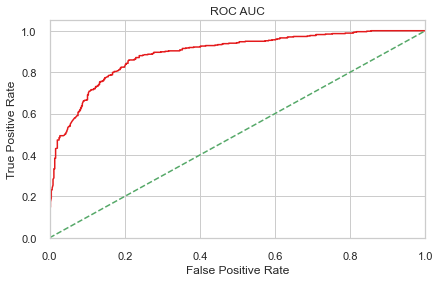

In [184]:
xgb_roc_auc = roc_auc_score(y_test, xgbc_tuned.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, xgbc_tuned.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC')
plt.show()

<a id="8.6"></a>

##### <b>8.6<span style='color:#4a8fdd'>|</span> Confusion matrix</b>

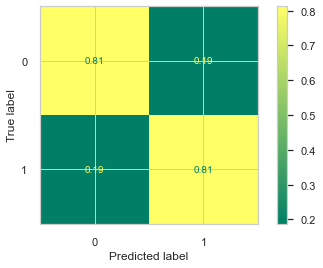

In [185]:
plot_confusion_matrix(xgbc_tuned,
                      x_test,
                      y_test,
                      cmap = "summer",
                      normalize = "true");

<a id="8.7"></a>

##### <b>8.7<span style='color:#4a8fdd'>|</span> Build model with full data</b>

In [186]:
xgbc_model_full = XGBClassifier(gamma = 1.5,
                           subsample = 1.0,
                           max_depth = 5,
                           colsample_bytree = 1.0,
                           n_estimators = 100)
xgbc_model_full = xgbc_model_full.fit(x, y)

<a id="9"></a>

### <b>9<span style='color:#4a8fdd'>|</span>SUBMISSION PROCESS (on test.csv)</b>

<a id="9.1"></a>

##### <b>9.1<span style='color:#4a8fdd'>|</span> Look at test_data</b>

In [187]:
test_data.head()

,id,home_planet,cryo_sleep,cabin,destination,age,vip,room_service,food_court,shopping_mall,spa,vr_deck,name,deck,side,total_bill,financial_situation,group_id,group_number,in_group
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,S,0.0,poor,0013,01,False
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,S,2832.0,poor,0018,01,False
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,S,0.0,poor,0019,01,False
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,S,7418.0,middle,0021,01,False
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,S,645.0,poor,0023,01,False


<a id="9.2"></a>

##### <b>9.2<span style='color:#4a8fdd'>|</span> Change values of some variables</b>

In [188]:
test_data["vip"] = test_data["vip"].replace(to_replace = [False, True],
                                  value = ["No", "Yes"]).astype("object")
test_data["cryo_sleep"] = test_data["cryo_sleep"].replace(to_replace = [False, True],
                                  value = ["No", "Yes"]).astype("object")

<a id="9.3"></a>

##### <b>9.3<span style='color:#4a8fdd'>|</span> Keep outside 'id' variable</b>

In [189]:
PassengerID = test_data["id"]
PassengerID.head()

0    0013_01
1    0018_01
2    0019_01
3    0021_01
4    0023_01
Name: id, dtype: object

<a id="9.4"></a>

##### <b>9.4<span style='color:#4a8fdd'>|</span> One-hot encoding test_data</b>

In [190]:
test_data = test_data.drop(["id", "total_bill", "cabin", "group_id", "group_number", "name"], axis = 1)
test_data = pd.get_dummies(test_data, drop_first = True)

<a id="9.5"></a>

##### <b>9.5<span style='color:#4a8fdd'>|</span> Make prediction</b>

In [191]:
y_pred = pd.Series(xgbc_model_full.predict(test_data)).map({0:False, 1:True})

<a id="9.6"></a>

##### <b>9.6<span style='color:#4a8fdd'>|</span> Create submission file</b>

In [192]:
submission = pd.DataFrame({"PassengerId": PassengerID.values, "Transported": y_pred})
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


<a id="9.7"></a>

##### <b>9.7<span style='color:#4a8fdd'>|</span> Save submission file</b>

In [193]:
submission.to_csv('submission.csv', index = False)
print("My competition submission: \n\n", submission)

My competition submission: 

      PassengerId  Transported
0        0013_01         True
1        0018_01        False
2        0019_01         True
3        0021_01         True
4        0023_01         True
...          ...          ...
4272     9266_02         True
4273     9269_01        False
4274     9271_01         True
4275     9273_01         True
4276     9277_01         True

[4277 rows x 2 columns]
